In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

PROCESS OF WRITING/BUILDING A TENSOR


In [ ]:
x=tf.constant(10.0) #value of constant tensors never change
y=tf.constant(15.0)
z=x+y
print(z) #output is a tensor of value 25

tf.Tensor(25.0, shape=(), dtype=float32)


In [ ]:
a=x//y
print(a)

tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
b=y/x
print(b)

tf.Tensor(1.5, shape=(), dtype=float32)


In [ ]:
print(x)

tf.Tensor(10.0, shape=(), dtype=float32)


In [ ]:
x=tf.constant(11)
print(x) #we can change constant value.

tf.Tensor(11, shape=(), dtype=int32)


In [ ]:
x=x+1
print(x) #constant tensors only change when we change it, variable tensors can
#on their own during the execution

tf.Tensor(12, shape=(), dtype=int32)


In [ ]:
A=tf.Variable(initial_value=[[0,1,2,3],[5,6,7,8]],shape=(2,4),dtype="int32",name='A')
print(A.numpy())
print(A.shape) #how long each dimension is
print(tf.rank(A)) #how many dimensions are there

[[0 1 2 3]
 [5 6 7 8]]
(2, 4)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
D=tf.constant(50,shape=[6,2])
print("rank of D: ",tf.rank(D))
print("shape: ",D.shape)
print(D)

rank of D:  tf.Tensor(2, shape=(), dtype=int32)
shape:  (6, 2)
tf.Tensor(
[[50 50]
 [50 50]
 [50 50]
 [50 50]
 [50 50]
 [50 50]], shape=(6, 2), dtype=int32)


**simple linear regression using tensor flow**




In [ ]:
#linear eq y=w*x+b
w=tf.Variable([.3],tf.float32)
b=tf.Variable([-.3],tf.float32)

x=tf.Variable([5.0],tf.float32) #x is a variable which will be fed
#values from the data file, but for initialising you give value as 5
print("w",w)
print("x",x)
print("b",b)
print("y",y)


w <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3], dtype=float32)>
x <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([5.], dtype=float32)>
b <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3], dtype=float32)>
y tf.Tensor(15.0, shape=(), dtype=float32)


In [ ]:
trainX=[3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313
        ,7.997,5.645,9.27,3.1]
trainY=[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.456,1.65
        ,2.904,2.42,2.94,1.3]
n=len(trainX)
w=tf.Variable(0.)
b=tf.Variable(0.)

trainsteps=100 #number of iterations
learnrate=0.01 #by how much you want to change weights

for i in range(trainsteps):
  with tf.GradientTape() as tape:
    #steps in the model will be converted to graph, but not in tf 2
    #doesnt happen automatically, hence we call this
    #like a tape recorder, records all actions in this loop, which can be run
    #again and again
    yhat=trainX*w+b
    error=yhat-trainY
    loss=tf.reduce_mean(tf.square(error)) #sqaure(error) sum of squared error, thats what best fit line does
    dw, db=tape.gradient(loss,[w,b])
    w.assign_sub(dw*learnrate)
    b.assign_sub(db*learnrate)
  if i%20==0:
    print("Loss at step ",i," is : ",format(loss))

print(f'w : {w.numpy()} , b={b.numpy()}')


Loss at step  0  is :  6.096368312835693
Loss at step  20  is :  0.21733124554157257
Loss at step  40  is :  0.21145927906036377
Loss at step  60  is :  0.20613142848014832
Loss at step  80  is :  0.2012973576784134
w : 0.3342319130897522 , b=0.21245163679122925


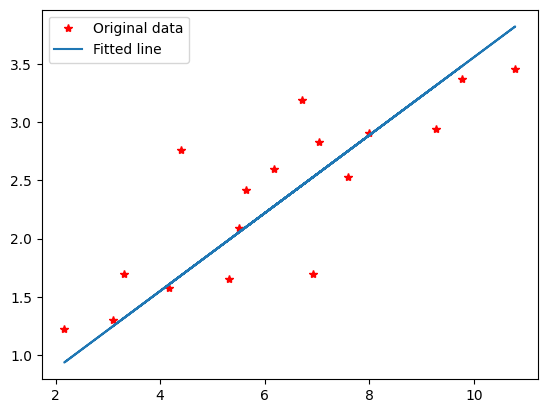

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(trainX,trainY,'r*',label="Original data")
plt.plot(trainX,np.array(w*trainX+b),label="Fitted line")
plt.legend()
plt.show()

In [ ]:
def linear_model(X_val):
  print((w*X_val+b).numpy())


In [ ]:
linear_model(8)

2.886307


**DIGIT CLASSIFICATION USING MNIST DATASET**

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
predictions=model(x_train[:1]).numpy()
predictions

array([[ 0.00342992,  0.19033644,  0.17641725,  0.2668645 , -0.4438849 ,
         0.03444402,  0.5607202 ,  0.3815874 , -0.41136238, -0.67619085]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.09311493, 0.11225142, 0.11069979, 0.12117906, 0.05953235,
        0.09604806, 0.16257264, 0.13590989, 0.06150031, 0.0471915 ]],
      dtype=float32)

In [ ]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1],predictions).numpy()

2.3429065

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5) #training model 5 times

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2977 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1399 - accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1050 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0870 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0748 - accuracy: 0.9765


In [ ]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0728 - accuracy: 0.9779 - 993ms/epoch - 3ms/step


[0.07279258966445923, 0.9779000282287598]

KERAS DEMO


In [ ]:
import pandas as pd
import numpy as np

# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
pd.isnull(red).count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [ ]:
pd.isnull(white).count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

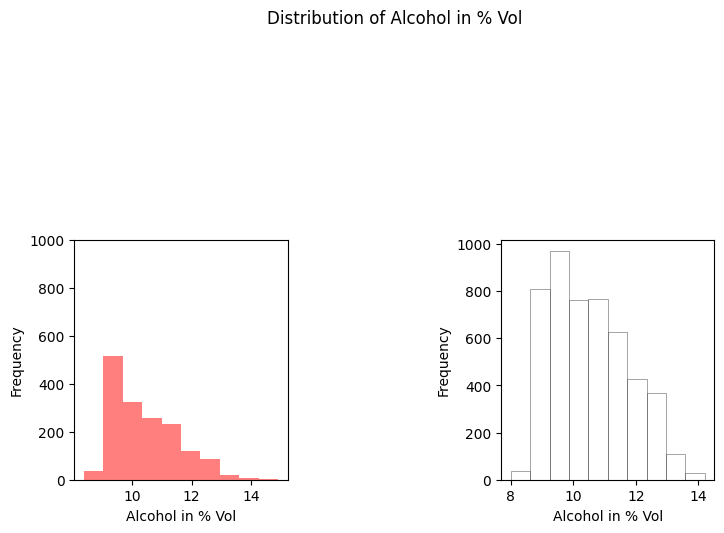

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [ ]:
# Add `type` column to `red` with value 1
red['type'] = 1
# we are doing binary classification by assigning 1 and 0
# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
wines.tail()

<ipython-input-9-7a75f674a909>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wines = red.append(white, ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [ ]:
from sklearn.model_selection import train_test_split

# Specify the data
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.type)
#y= wines.type

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

AttributeError: ignored

In [ ]:
y_test[0:10]
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

NameError: ignored

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model architecture

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer
model.add(Dense(8, activation='sigmoid'))

# Add an output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

In [ ]:
y_pred = np.round(model.predict(X_test))
y_pred[0:10]

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [ ]:
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()